In [1]:
import numpy as np
import pandas as pd
#!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
df_canada = pd.read_excel('Canada.xlsx', 'Canada by Citizenship', skiprows=range(20), skipfooter=2)
print('Data Downloaded and read into a dataframe!')

Data Downloaded and read into a dataframe!


In [4]:
#Let's take a look at the first five items in our dataset.
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
## print the dimensions of the dataframe
print(df_canada.shape)

(195, 43)


# Clean up Data

In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_canada.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_canada.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_canada.columns = list(map(str, df_canada.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_canada.set_index('Country', inplace=True)

# add total column
df_canada['Total'] = df_canada.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('Data Dimensions:', df_canada.shape)

Data Dimensions: (195, 38)


# Visualizing Data using Matplotlib

In [14]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


# Pie Charts

We will use pandas groupby method to summarize the immigration data by Continent

In [15]:
# group countries by continents and apply sum() function 
df_continent = df_canada.groupby('Continent', axis=0).sum()

In [16]:
# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_canada.groupby('Continent', axis=0)))

df_continent.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


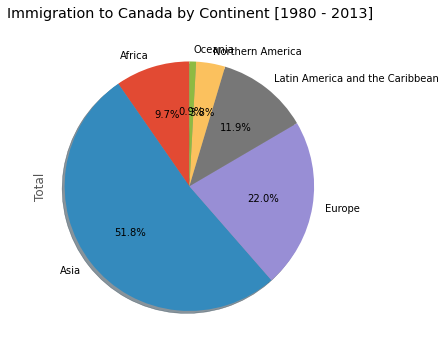

In [17]:
# autopct create %, start angle represent starting point
df_continent['Total'].plot(kind='pie',
                  figsize=(5,6),
                  autopct='%1.1f%%', # add in percentages
                  startangle=90,# start angle 90° (Africa)
                  shadow=True)# add shadow 

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')# Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear<br>

Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().<br>
Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.<br>
Pass in a custom set of colors for continents by passing in colors parameter.<br>
Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter<br>

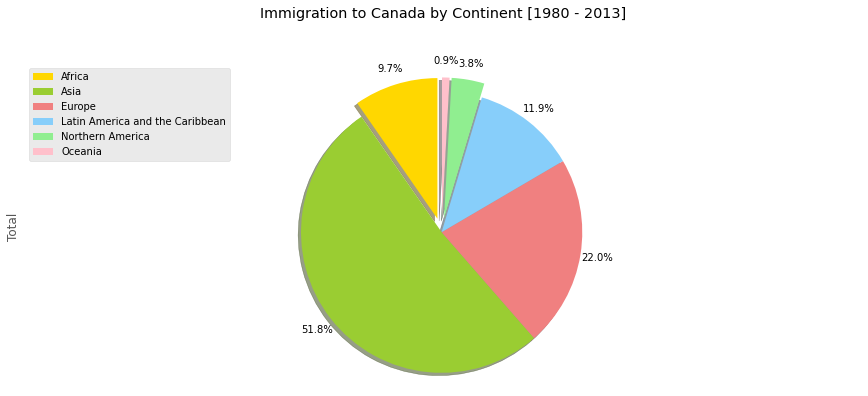

In [19]:
colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] #ratio for each continent with which to offset each wedge.

df_continent['Total'].plot(kind='pie',
                          figsize=(15, 6),
                          autopct='%1.1f%%',
                          startangle=90,
                          shadow=True,
                          labels=None, # turn off labels on pie chart
                          pctdistance=1.12,# the ratio between the center of each pie slice and the start of the text generated by autopct 
                          colors=colors_list,# add custom colors
                          explode=explode_list)# 'explode' lowest 3 continents

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis('equal')

#add legend
plt.legend(labels=df_continent.index, loc='upper left')

plt.show()

# Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

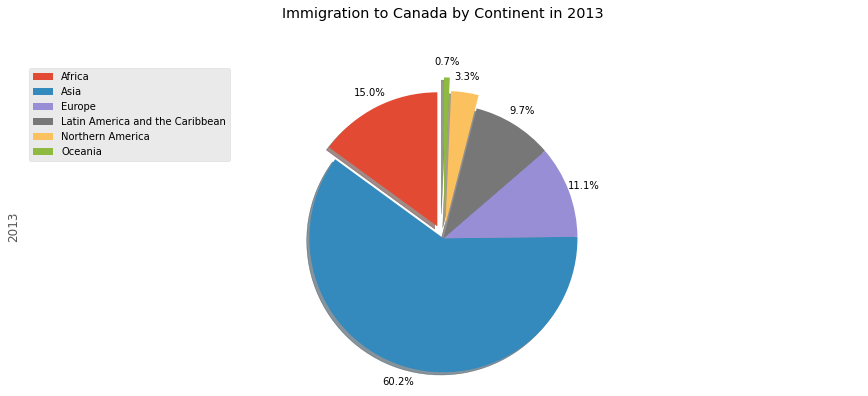

In [21]:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge

df_continent['2013'].plot(kind='pie',
                          figsize=(15, 6),
                          autopct='%1.1f%%',
                          startangle=90,
                          shadow=True,
                          labels=None,
                          explode=explode_list,
                          pctdistance=1.12)

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12)
plt.axis('equal')

# add legend
plt.legend(labels=df_continent.index, loc='upper left')

plt.show()

# Box Plots

# Japanese immigrants between 1980 - 2013.

In [22]:
# to get a dataframe, place extra square brackets around 'Japan'
df_japan = df_canada.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


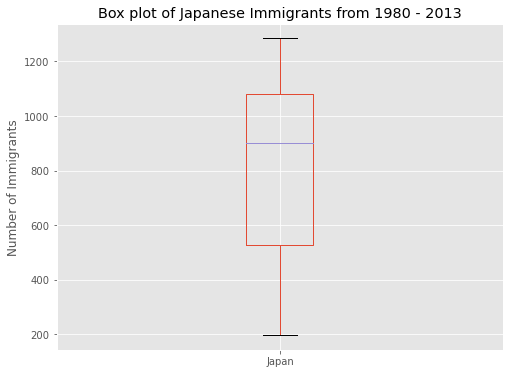

In [23]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).<br>
25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).<br>
75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).<br>

In [24]:
#view the actual numbers by calling the describe() method on the dataframe
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


# Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [26]:
# to get a dataframe, place extra square brackets around 'Japan'
df_CI = df_canada.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


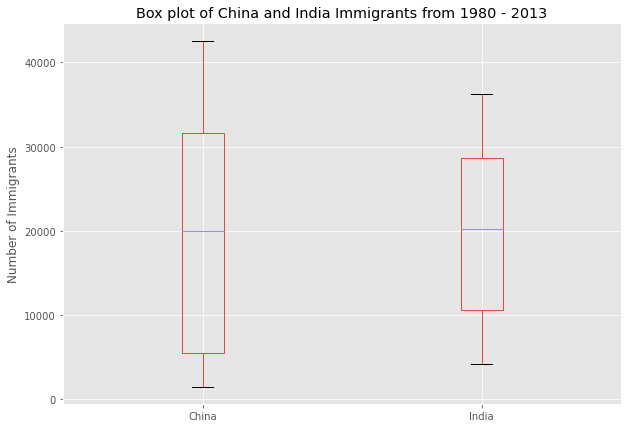

In [29]:
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of China and India Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can observe that, while both countries have around the same median immigrant population (~20,000), China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

In [28]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


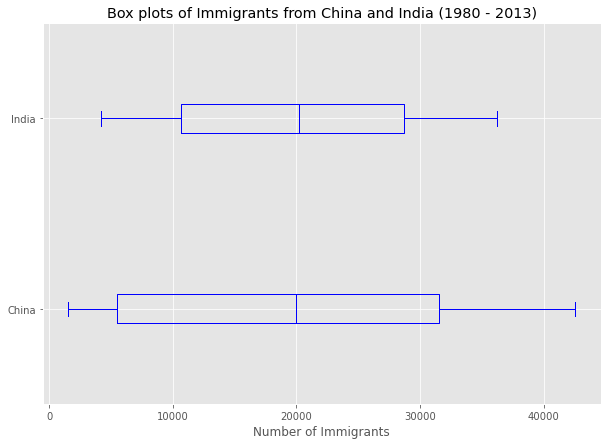

In [30]:
#horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

# Subplots

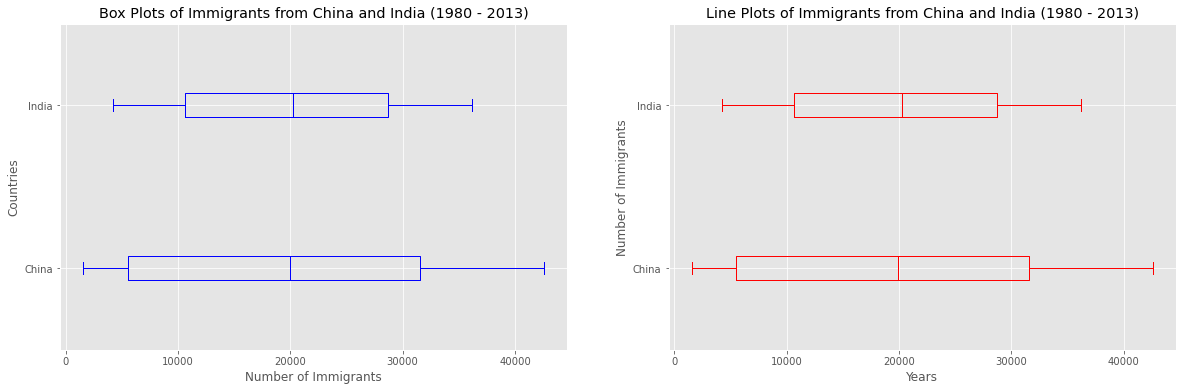

In [32]:
fig=plt.figure() #creates a figure

ax0= fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1= fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_ylabel('Countries')
ax0.set_xlabel('Number of Immigrants')

# Subplot 2: Box plot
df_CI.plot(kind='box', color='red', vert=False, figsize=(20, 6), ax=ax1)
ax1.set_title('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

# Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [34]:
# to get a dataframe, place extra square brackets around 'Japan'
#get the top 15 countries
df_top15 = df_canada.sort_values(['Total'], ascending= False, axis=0).head(15)
df_top15.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [36]:
 # create a list of all years in decades 80's, 90's, and 00's
decade80= list(map(str, range(1980, 1990)))
decade90= list(map(str, range(1990, 2000)))
decade00= list(map(str, range(2000, 2010)))

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, decade80].sum(axis=1)
df_90s = df_top15.loc[:, decade90].sum(axis=1)
df_00s = df_top15.loc[:, decade00].sum(axis=1)

# merge the three series into a new data frame
df_3_decades = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s': df_00s})

df_3_decades.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [37]:
df_3_decades.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


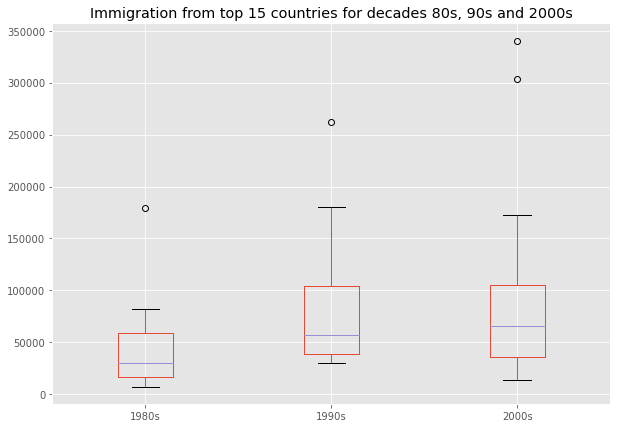

In [38]:
df_3_decades.plot(kind='box', figsize=(10, 7))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

In order to be an outlier, the data value must be:<br>

larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
smaller than Q1 by at least 1.5 times the IQR.<br>
Look at decade 2000s as an example:<br>

Q1 (25%) = 36,101.5<br>
Q3 (75%) = 105,505.5<br>
IQR = Q3 - Q1 = 69,404<br>
Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.<br>

Outlier > 105,505.5 + (1.5 * 69,404)<br>
Outlier > 209,611.5<br>

In [40]:
# let's check how many entries fall above the outlier threshold 
df_3_decades[df_3_decades['2000s'] > 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

# Scatter Plots

# Visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

In [49]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_canada[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = list(map(int, df_tot.index))

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


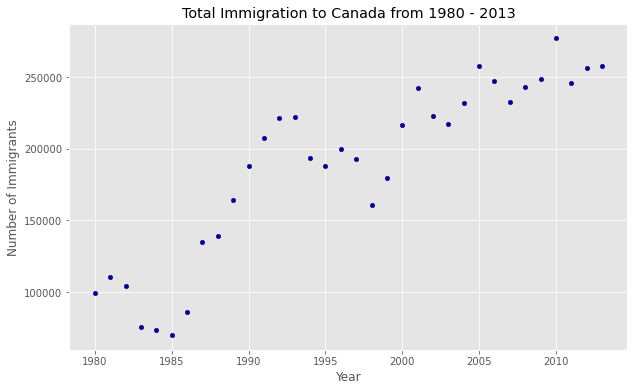

In [42]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

plt.show()

# So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

x: x-coordinates of the data.<br>
y: y-coordinates of the data.<br>
deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.<br>

In [43]:
x= df_tot['year']
y= df_tot['total']

fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a*x + b, our output has 2 elements, with the the slope in position 0 and intercept in position 1.

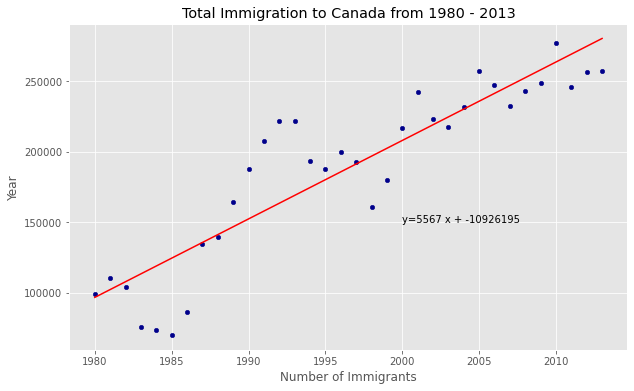

No. Immigrants = 5567 * Year + -10926195


In [46]:
#Step 2: Plot the regression line on the scatter plot.
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.ylabel('Year')
plt.xlabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color ='red')# recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
print('No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])) 

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:<br>

No. Immigrants = 5567 * Year - 10926195<br>
No. Immigrants = 5567 * 2015 - 10926195<br>
No. Immigrants = 291,310<br>

# Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

In [65]:
df_countries = df_canada.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [66]:
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

In [67]:
# reset index in place
df_total.reset_index(inplace=True)
df_total.head()

,index,0
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [68]:
# rename columns
df_total.columns = ['year', 'total']
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [69]:
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

In [70]:
# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


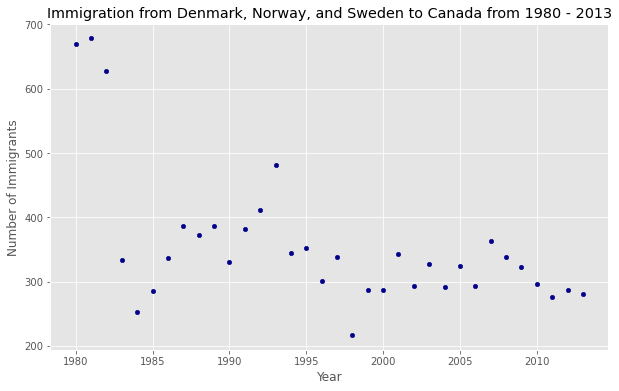

In [71]:
df_total.plot(kind='scatter', x = 'year', y = 'total', figsize =(10, 6), color='darkblue')

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

plt.show()

# Get the data for Brazil and Argentina.

In [77]:
df_canada_t = df_canada[years].transpose()# transposed dataframe

# cast the Years (the index) to type int
df_canada_t.index = map(int, df_canada_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_canada_t.index.name = 'year'

# reset index to bring the Year in as a column
df_canada_t.reset_index(inplace=True)

df_canada_t.head()

Country,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Step 2: Create the normalized weights

There are several methods of normalizations in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0,1]. The general formula is:<br>

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

In [78]:
# normalize Brazil data
norm_brazil = (df_canada_t['Brazil'] - df_canada_t['Brazil'].min())/(df_canada_t['Brazil'].max() - df_canada_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_canada_t['Argentina'] - df_canada_t['Argentina'].min())/(df_canada_t['Argentina'].max() - df_canada_t['Argentina'].min())

Step 3: Plot the data.

To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the ax parameter.<br>
We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:<br>
multiply weights by 2000 to scale it up on the graph, and,<br>
add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).<br>

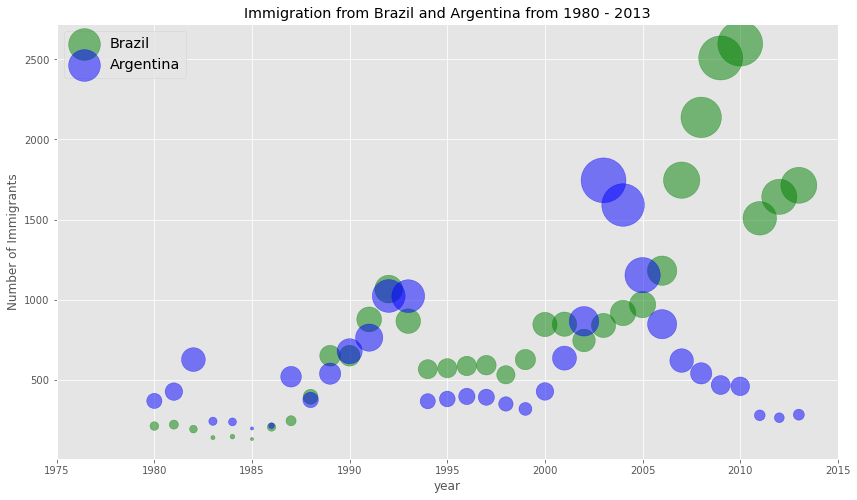

In [84]:
#Brazil

ax0 = df_canada_t.plot(kind='scatter',
                       x='year',
                       y='Brazil',
                       figsize=(14, 8),
                       alpha=0.5,
                       color='green',
                       s=norm_brazil * 2000 + 10, # pass in weights 
                       xlim=(1975, 2015))
#Argentina
ax1 = df_canada_t.plot(kind='scatter',
                    x='year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil','Argentina'], loc='upper left', fontsize='x-large')

# Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013.

In [86]:
#normalize China
norm_China = (df_canada_t['China'] - df_canada_t['China'].min())/(df_canada_t['China'].max() - df_canada_t['China'].min())

#Normalize India
norm_India = (df_canada_t['India'] - df_canada_t['India'].min())/(df_canada_t['India'].max() - df_canada_t['India'].min())

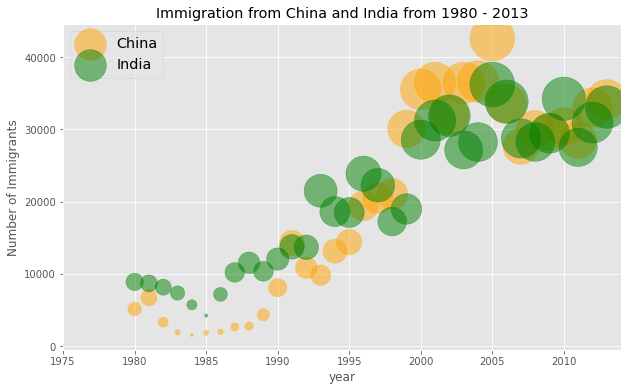

In [88]:
#China

ax0 = df_canada_t.plot(kind='scatter',
                       x='year',
                       y='China',
                       figsize=(10, 6),
                       alpha=0.5,
                       color='orange',
                       s=norm_China * 2000 + 10,
                       xlim=(1975, 2014))

#India

ax1 = df_canada_t.plot(kind='scatter',
                      x='year',
                      y='India',
                      alpha=0.5,
                      color='green',
                      s=norm_India * 2000 + 10,
                      ax=ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China','India'], loc='upper left', fontsize='x-large')